In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_excel('D:\Liberty (Base data work)\Actual data (North).xlsx')

<>:9: SyntaxWarning: invalid escape sequence '\L'
<>:9: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1727216701.py:9: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_excel('D:\Liberty (Base data work)\Actual data (North).xlsx')


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Filter data
df_filtered = df[~df['Policy Status'].str.contains('Open', case=False, na=False)]
df_filtered = df_filtered[df_filtered['Policy Status'].str.contains('Renewed|Not Renewed', case=False, na=False)]

# Create binary status
df_filtered['Status_Binary'] = df_filtered['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selected columns
selected_columns = ['variant', 'RTO Location ', 'Product name  2', 'biztype', 'age', 'Number of Vehicles', 'Number of Policies',
                    'Total Premium Payable (Overall)', 'Total OD Premium (Overall)',
                    'Total TP Premium (Overall)', 'Total Add on Premium (Overall)', 'Average Discount (Overall)',
                    'Average NCB % Previous Year (Overall)', 'Total GST (Overall)', 'Number of Claims',
                    'Number of Declines', 'New Customer', 'Customer Tenure ', 'Status_Binary']

df_selected = df_filtered[selected_columns]

# Label encoding for high-cardinality categorical features
label_enc_features = ['variant', 'RTO Location ',  'age']
for col in label_enc_features:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# One-hot encode remaining low-cardinality features
df_selected = pd.get_dummies(df_selected, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(df_selected.drop(columns=['Status_Binary']))
y = df_selected['Status_Binary']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\3269962299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\3269962299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\3269962299.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Shape of X: (198537, 33)
Shape of y: (198537,)



Moderate Decision Tree Rules:
|--- Customer Tenure  <= 1.50
|   |--- biztype_Roll Over <= 0.50
|   |   |--- Number of Vehicles <= 1.50
|   |   |   |--- Average Discount (Overall) <= 77.45
|   |   |   |   |--- age <= 1408.00
|   |   |   |   |   |--- Total Add on Premium (Overall) <= 7652.12
|   |   |   |   |   |   |--- Number of Declines <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Number of Declines >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Total Add on Premium (Overall) >  7652.12
|   |   |   |   |   |   |--- Total Add on Premium (Overall) <= 8109.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Total Add on Premium (Overall) >  8109.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  1408.00
|   |   |   |   |   |--- age <= 2784.50
|   |   |   |   |   |   |--- Average Discount (Overall) <= 62.08
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Average

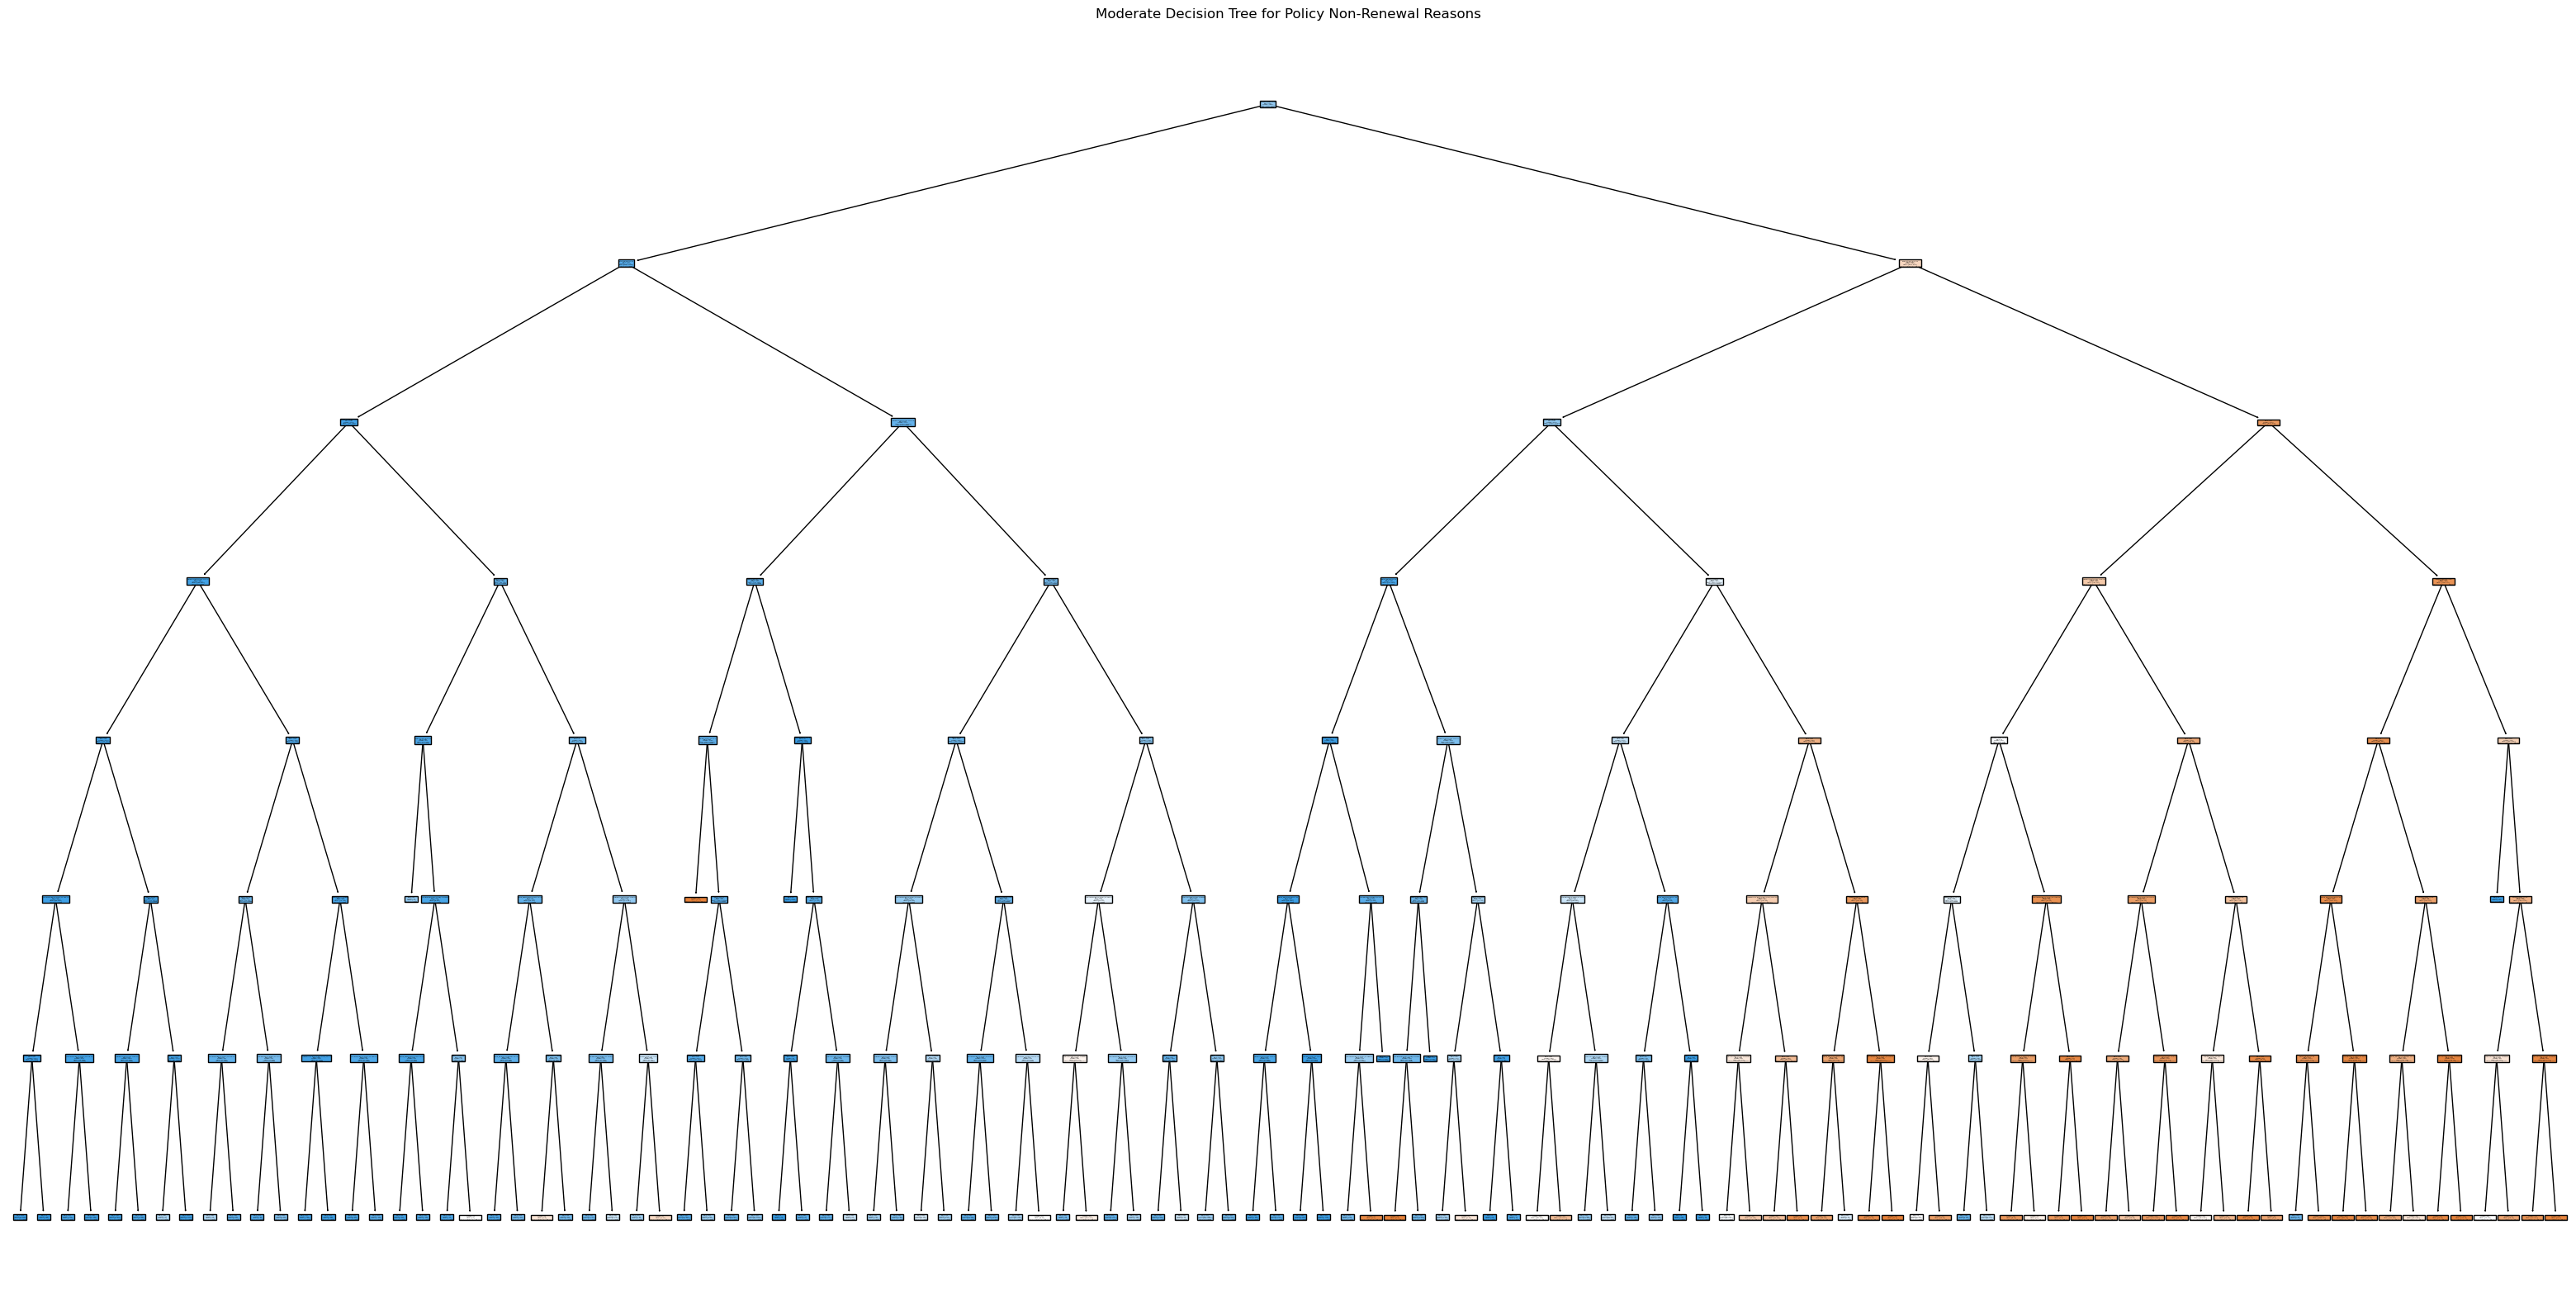

In [3]:
# Evaluate Decision tree model
dt_model_moderate = DecisionTreeClassifier(
    max_depth=7,                
    min_samples_split=20,       
    min_samples_leaf=10,        
    random_state=42
)
dt_model_moderate.fit(X, y)

# Export tree rules as text
tree_rules_moderate = export_text(dt_model_moderate, feature_names=df_selected.drop(columns=['Status_Binary']).columns)
print("\nModerate Decision Tree Rules:")
print(tree_rules_moderate)

# Plot the decision tree
plt.figure(figsize=(40, 20))  
plot_tree(dt_model_moderate, 
          feature_names=df_selected.drop(columns=['Status_Binary']).columns, 
          class_names=['Renewed/Delayed Renewed', 'Not Renewed'], 
          filled=True)

plt.title('Moderate Decision Tree for Policy Non-Renewal Reasons')

plt.savefig("decision_tree_large South.png", dpi=300)  
plt.show()

with open("decision_tree_rules_test North.txt", "w") as file:
    file.write(tree_rules_moderate)

Feature Importance (all features):
variant                                              0.005782
RTO Location                                         0.003249
age                                                  0.008623
Number of Vehicles                                   0.052107
Number of Policies                                   0.021220
Total Premium Payable (Overall)                      0.005920
Total OD Premium (Overall)                           0.005563
Total TP Premium (Overall)                           0.004829
Total Add on Premium (Overall)                       0.004593
Average Discount (Overall)                           0.007895
Average NCB % Previous Year (Overall)                0.006127
Total GST (Overall)                                  0.003908
Number of Claims                                     0.006785
Number of Declines                                   0.020332
Customer Tenure                                      0.349867
Product name  2_Package, SOD       

C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1146843507.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="coolwarm")


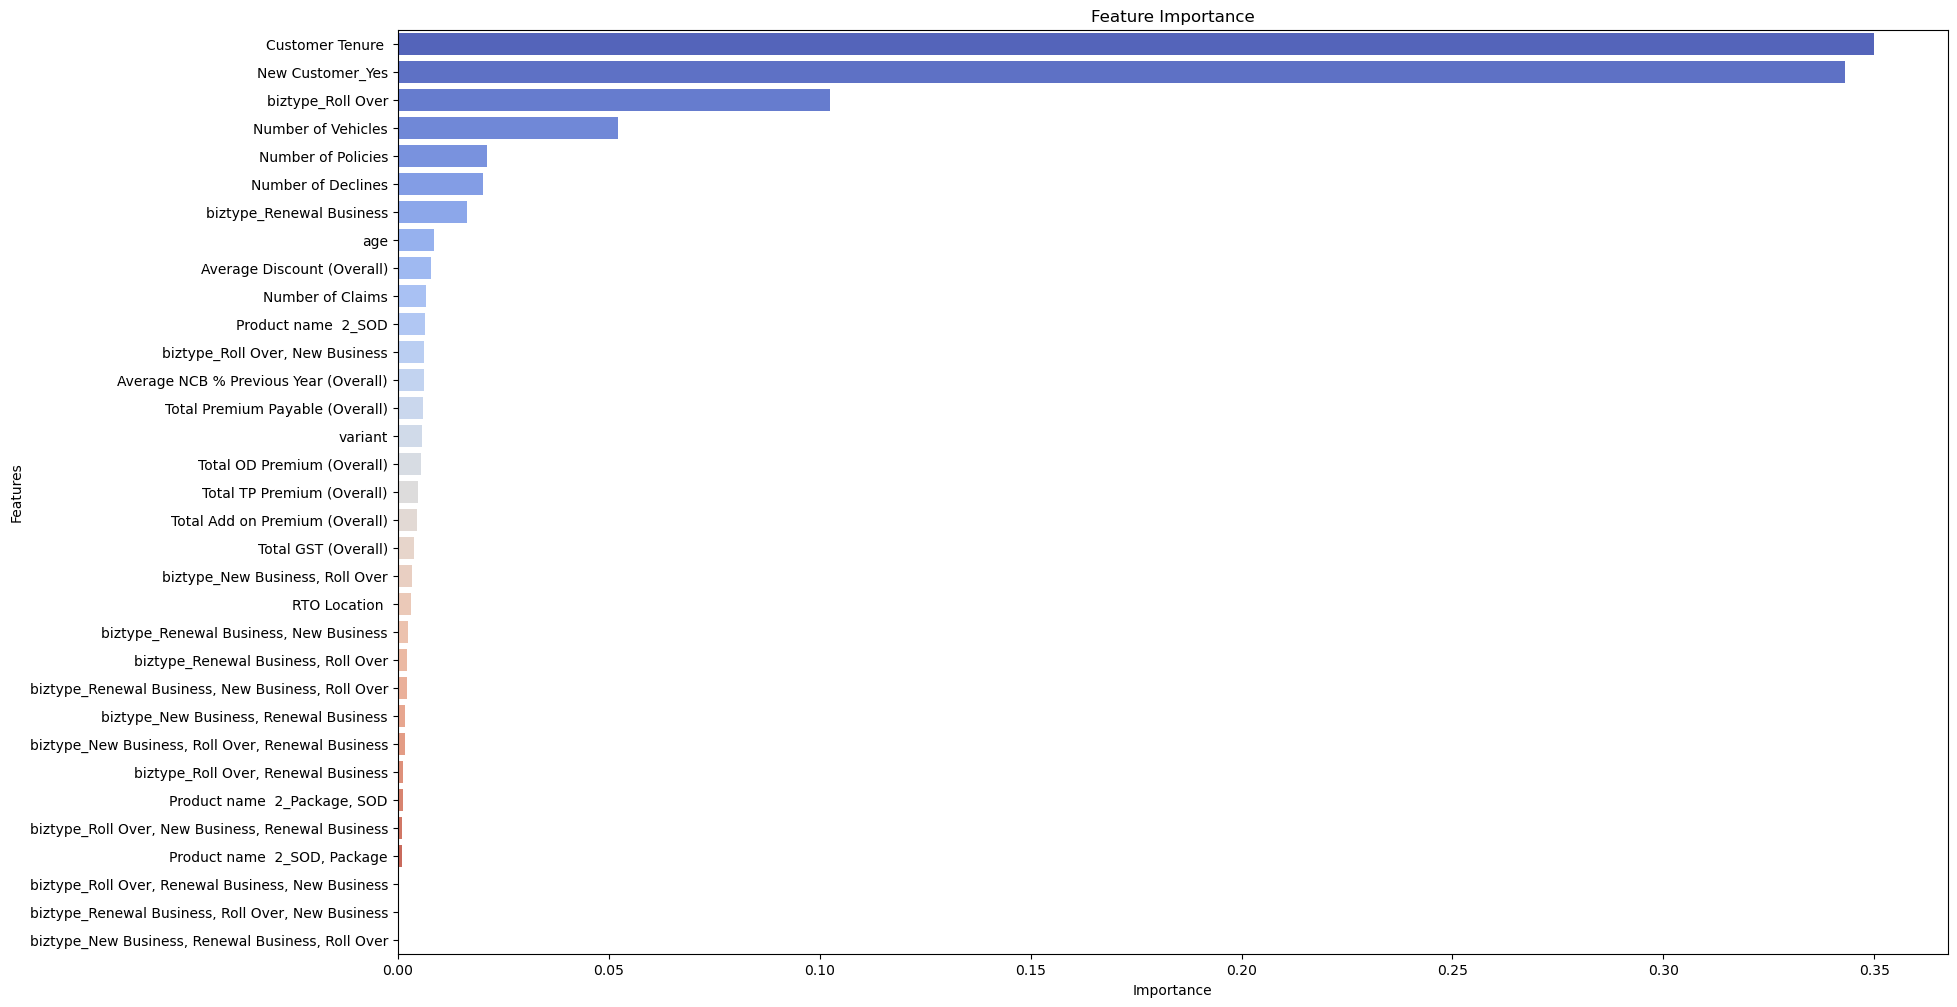

In [4]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

model.fit(X, y)

# Evaluate the Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=df_selected.drop(columns=['Status_Binary']).columns)

print("Feature Importance (all features):")
print(feature_importances)

# Plot the Feature importance graph
plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="coolwarm")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

feature_importances_df = pd.DataFrame({'Feature': feature_importances.index, 'Importance': feature_importances.values})
feature_importances_df.to_csv('feature_importances north.csv', index=False)